# Explorando o modelo generalizado de Lotka-Volterra

- PET - Física
- Petiano: Gabriel Wendell Celestino Rocha
- Data: 19 de Outubro de 2022

O objetivo deste `Notebook` é abordar com mais detalhes um dos modelos mais famosos no âmbito dos Sistemas Dinâmicos: **o modelo de Lotka-Volterra**. Embora esse tema tenha sido abordado anteriormente no `Notebook` [Equações de Lotka-Volterra](https://github.com/gustavoavb/PET.py/blob/master/Equações_de_Lotka-Volterra.ipynb) **[1]** escrito por um ex-petiano, aqui vamos estudar esse modelo com mais detalhes para assim conseguirmos generalizar o modelo de Lotka-Volterra.

Para uma melhor organização deste `Notebook` como um todo, este foi dividido em quatro seções:

- **Preliminares: revisitando o modelo predador-presa**;
- **O modelo generalizado de Lotka-Volterra**;
- **Condições para o ponto de coexistência em um modelo multiespécie de Lotka-Volterra**.

## Pré-requisitos

Este `Notebook` assume que o leitor esteja ao menos familiarizado com o ambiente de programação Python. Apesar de não ser obrigatório, recomenda-se que o leitor ao menos refaça o `Notebook` [Equações de Lotka-Volterra](https://github.com/gustavoavb/PET.py/blob/master/Equações_de_Lotka-Volterra.ipynb) **[1]**. Entretanto, na seção 0. deste `Notebook` vamos revisitar alguns conceitos relativos ao modelo de Lotka-Volterra clássico abordado em **[1]**. Caso o leitor já tenha conhecimento de tal assunto, sinta-se a vontade para avançar direto para a seção 1. relativa ao modelo generalizado de Lotka-Volterra.

### Importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
import sympy as sy

%matplotlib notebook

def opt_plot():
    # plt.style.use('dark_background')
    plt.grid(True, linestyle = ':', color = '0.50')
    plt.rcParams['font.family'] = 'monospace'
    plt.rcParams['font.size'] = 15
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)
    
import warnings
warnings.filterwarnings('ignore')

#### Detalhes das bibliotecas:

In [2]:
%load_ext version_information
%version_information Matplotlib, Scipy, Numpy

Software versions
Python 3.9.8 64bit [MSC v.1929 64 bit (AMD64)]
IPython 8.0.1
OS Windows 10 10.0.19044
Matplotlib 3.6.0
Scipy 1.8.0
Numpy 1.21.6
Mon Oct 17 22:41:22 2022 Hora Padrão de Buenos Aires

---

## 0. Preliminares: revisitando o modelo predador-presa

Vamos começar relembrando alguns conceitos básicos sobre o modelo de interação predatória de Lotka-Volterra, também conhecido como equações de predador-presa. Proposto independentemente por Alfred J. Lotka em 1925 e Vito Volterra em 1926, o modelo predador-presa constitui um modelo matemático para a dinâmica populacional de um sistema biológico composto por um predador e uma presa. Essas equação ficaram conhecidas como as *equações de Lotka-Volterra* e se tornaram um modelo icônico da biologia matemática.

### 0.1 Fundamentação teórica

Para desenvolvermos essas equações, suponha que uma população de predadores se alimente de uma população de presas. Assumimos que o número de presas cresce exponencialmente na ausência de predadores (uma vez que há comida ilimitada disponível para a presa) e que o número de predadores decai exponencialmente na ausência de presas (já que os predadores devem comer as presas ou morrer de fome). O contato entre predadores e presas aumenta o número de predadores e diminui o número de presas.

Seja $U(t)$ e $V(t)$ o número de presas e predadores no momento $t$. Para desenvolver um modelo de equação diferencial acoplada, consideramos o tamanho da população no tempo $t+\Delta t$.

O crescimento exponencial de presas na ausência de predadores e o decaimento exponencial de predadores na ausência de presas podem ser modelados pelos termos lineares usuais. O acoplamento entre presa e predador deve ser modelado com dois parâmetros adicionais. Escrevemos os tamanhos populacionais no momento $t+\Delta t$ como

$$\tag{0.1}\begin{cases}
U\left(t+\Delta t\right)=U\left(t\right)+\alpha\Delta tU\left(t\right)-\gamma\Delta t\cdot U\left(t\right)V\left(t\right) & ,\\
V\left(t+\Delta t\right)=V\left(t\right)+e\gamma\Delta t\cdot U\left(t\right)V\left(t\right)-\beta\Delta t\cdot V\left(t\right) & .
\end{cases}$$

Os parâmetros $\alpha$ e $\beta$ são a taxa média de natalidade per capita das presas e a taxa de mortalidade dos predadores, na ausência das outras espécies. Os termos de acoplamento modelam o contato entre predadores e presas. O parâmetro $\gamma$ é a fração de presas capturadas por predador por unidade de tempo; o número total de presas capturadas pelos predadores durante o tempo $\Delta t$ é $\gamma\Delta t\cdot UV$. A presa ingerida é então convertida em predadores recém-nascidos (veja isso como uma conversão de biomassa), com fator de conversão $e$, de modo que o número de predadores durante o tempo $\Delta t$ aumenta em $e\gamma\Delta t\cdot UV$.


Convertendo essas equações em equações diferenciais deixando $\Delta t\rightarrow0$, obtemos as bem conhecidas equações Lotka-Volterra predador-presa

$$\tag{0.2}\frac{\text{d}U}{\text{d}t}=\alpha U-\gamma UV\quad,\quad\frac{\text{d}V}{\text{d}t}=e\gamma UV-\beta V.$$

Antes de analisar as equações de Lotka-Volterra, primeiro revisamos a análise de estabilidade linear e de ponto fixo aplicada ao que é chamado de sistema autônomo de equações diferenciais. Por simplicidade, consideramos um sistema de apenas duas equações diferenciais da forma

$$\tag{0.3}\dot{x}=f\left(x,y\right)\quad,\quad\dot{y}=g\left(x,y\right),$$

embora nossos resultados possam ser generalizados para sistemas maiores. O sistema dado por $(0.2)$ é dito autônomo uma vez que $f$ e $g$ não depende explicitamente da variável independente $t$. Os pontos fixos deste sistema são determinados definindo $\hat{x}=\hat{y}=0$ e resolvendo $x$ para e $y$. Suponha que um ponto fixo é $(x_{*},y_{*})$. Para determinar sua estabilidade linear, consideramos condições iniciais para $(x,y)$ perto do ponto fixo com pequenas perturbações independentes em ambas as direções, ou seja, $x(0)=x_{*}+\epsilon(0)$, $y(0)=y_{*}+\delta(0)$. Se a perturbação inicial cresce no tempo, dizemos que o ponto fixo é instável; se decair, dizemos que o ponto fixo é estável. De acordo com isso, deixamos

$$\tag{0.4}x\left(t\right)=x_{*}+\epsilon\left(t\right)\quad,\quad y\left(t\right)=y_{*}+\delta\left(t\right).$$

Substituindo $(0.4)$ em $(0.3)$ podemos determinar a dependência no tempo de $\epsilon$ e $\delta$. Como $x_{*}$ e $y_{*}$ são constantes, temos

$$\tag{0.5} \dot{\epsilon}=f\left(x_{*}+\epsilon,y_{*}+\delta\right)\quad,\quad\dot{\delta}=g\left(x_{*}+\epsilon,y_{*}+\delta\right).$$

A análise de estabilidade linear prossegue assumindo que as perturbações iniciais $\epsilon(0)$ e $\delta(0)$ são pequenas o suficiente para truncar a expansão bidimensional em série de Taylor de $f$ e $g$ em torno de $\epsilon=\delta=0$ para primeira ordem em $\epsilon$ e $\delta$. Observe que, em geral, a série de Taylor bidimensional de uma função $F(x,y)$ sobre a origem é dada por

$$\tag{0.6} F\left(x,y\right)=F\left(0,0\right)+xF_{x}\left(0,0\right)+yF_{y}\left(0,0\right)+\frac{1}{2}\left[x^{2}F_{xx}\left(0,0\right)+2xyF_{xy}\left(0,0\right)+y^{2}F_{yy}\left(0,0\right)\right]+\ldots$$

onde os termos da expansão podem ser lembrados exigindo que todas as derivadas parciais da série concordem com a de $F(x,y)$ na origem. Agora expandimos a série de Taylor $f(x_{∗}+\epsilon,y_{∗}+\delta)$ e $g(x_{∗}+\epsilon,y_{∗}+\delta)$ em torno de $(\epsilon,\delta)=(0,0)$. Os termos constantes desaparecem pois $(x_{∗},y_{∗})$ é um ponto fixo, e desprezamos todos os termos com ordens superiores a $\epsilon$ e $\delta$. Portanto,

$$\tag{0.7} \begin{cases}
\dot{\epsilon}=\epsilon f_{x}\left(x_{*},y_{*}\right)+\delta f_{y}\left(x_{*},y_{*}\right)\\
\dot{\delta}=\epsilon g_{x}\left(x_{*},y_{*}\right)+\delta g_{y}\left(x_{*},y_{*}\right)
\end{cases} \iff \frac{\text{d}}{\text{d}t}\left(\begin{array}{c}
\epsilon\\
\delta
\end{array}\right)=\left(\begin{array}{cc}
f_{x}^{*} & f_{y}^{*}\\
g_{x}^{*} & g_{y}^{*}
\end{array}\right)\left(\begin{array}{c}
\epsilon\\
\delta
\end{array}\right).$$

onde $f^{∗}_{x}=f_{x}(x_{*},y_{∗})$, etc. A equação $(0.7)$ é um sistema de EDOs lineares, e sua solução procede assumindo a forma

$$\tag{0.8}\left(\begin{array}{c}
\epsilon\\
\delta
\end{array}\right)=e^{\lambda t}\boldsymbol{v}.$$

Ao substituir $(0.8)$ em $(0.7)$, e cancelando o termo $e^{\lambda t}$, obtemos o problema de autovalor de álgebra linear

$$\tag{0.9} \text{J}^{*}\boldsymbol{v}=\lambda\boldsymbol{v}\quad,\quad\text{J}^{*}=\left(\begin{array}{cc}
f_{x}^{*} & f_{y}^{*}\\
g_{x}^{*} & g_{y}^{*}
\end{array}\right),$$

onde $\lambda$ é o autovalor, $\boldsymbol{v}$ o autovetor correspondente, e $\text{J}^{*}$ a matriz Jacobiana avaliada no ponto fixo. O autovalor é determinado a partir da equação característica

$$\tag{0.10} \det\left(\text{J}^{*}-\lambda I\right)=0,$$

que para uma matriz Jacobiana $2\times2$ resulta em uma equação quadrática para $\lambda$. Da forma da solução $(0.8)$, o ponto fixo é estável se para todos os autovalores $\lambda$, $\text{Re}\{\lambda\}<0$, e instável se para pelo menos um $\lambda$, $\text{Re}\{\lambda\}>0$. Aqui $\text{Re}\{\lambda\}$ significa a parte real do (possivelmente) valor próprio complexo $\lambda$. Agora reconsideramos as equações de Lotka-Volterra. Soluções de ponto fixo são encontradas resolvendo $\dot{U}=\dot{V}=0$, e temos de $(0.2)$:

$$\tag{0.11} \begin{cases}
U\left(\alpha-\gamma V\right)=0\\
V\left(e\gamma U-\beta\right)=0
\end{cases}\implies \left(U_{*},V_{*}\right)=\left(0,0\right)\quad\vee\quad\left(U_{*},V_{*}\right)=\left(\frac{\beta}{e\gamma},\frac{\alpha}{\gamma}\right).$$

O ponto fixo trivial $(0,0)$ é instável, pois a população de presas cresce exponencialmente se for inicialmente pequena. Para determinar a estabilidade do segundo ponto fixo, escrevemos a equação de Lotka-Volterra na forma

$$\tag{0.12} \begin{cases}
\frac{\text{d}U}{\text{d}t}=F\left(U,V\right)\\
\frac{\text{d}V}{\text{d}t}=G\left(U,V\right)0.
\end{cases}\quad,\quad \begin{cases}
F\left(U,V\right)=\alpha U-\gamma UV\\
G\left(U,V\right)=e\gamma UV-\beta V
\end{cases}.$$

As derivadas parciais são então calculadas para serem da forma

$$\tag{0.13} \begin{cases}
F_{U}=\alpha-\gamma V, & F_{V}=-\gamma U;\\
G_{U}=e\gamma V, & G_{V}=e\gamma U-\beta.
\end{cases}$$

O Jacobiano no ponto fixo $(U_{∗},V_{∗})=\left(\frac{\beta}{e\gamma},\frac{\alpha}{\gamma}\right)$ é

$$\tag{0.14} \text{J}^{*}=\left(\begin{array}{cc}
0 & -\frac{\beta}{e}\\
e\alpha & 0
\end{array}\right)\implies\det\left(\text{J}^{*}=\lambda\mathbb{I}\right)=\left|\begin{array}{cc}
-\lambda & -\frac{\beta}{e}\\
e\alpha & -\lambda
\end{array}\right|=\lambda^{2}+\alpha\beta=0,$$

tem as soluções $\lambda_{\pm}=\pm i\sqrt{\alpha\beta}$, que são puramente imaginárias. Quando os autovalores do jacobiano dois a dois são puramente imaginários, o ponto fixo é chamado de centro e a perturbação não cresce nem decai, mas oscila. Aqui, a frequência angular de oscilação é $\omega=\sqrt{\alpha\beta}$ e o período de oscilação é $\frac{2\pi}{\omega}$.

Plotamos $U$ e $V$ versus $t$ (gráfico de série temporal) e $V$ versus $U$ (retratos de fase) para ver como as soluções se comportam. Para um sistema de equações não linear como $(0.2)$, é necessária uma solução numérica.

As equações de Lotka-Volterra possuem quatro parâmetros livres $\alpha$, $\beta$, $\gamma$ e $e$. As unidades relevantes aqui são o tempo, o número de presas e o número de predadores. O Teorema Pi de Buckingham prevê que a não dimensionalização das equações pode reduzir o número de parâmetros livres em três para um agrupamento de parâmetros sem dimensão e gerenciável. Optamos por não dimensionalizar o tempo usando a frequência angular de oscilação e o número de presas e predadores usando seus valores de ponto fixo. Com acentos circunflexos denotando as variáveis adimensionais, obtemos:

$$\tag{0.15} \hat{t}=\sqrt{\alpha\beta}\cdot t,\quad\hat{U}=\frac{U}{U_{*}}=\frac{e\gamma}{\beta}U,\quad\hat{V}=\frac{V}{V_{*}}=\frac{\gamma}{\alpha}V.$$

Substituindo $(0.12)$ nas equações de Lotka-Volterra $(0.2)$ resulta nas equações adimensionais:

$$\tag{0.16} \frac{\text{d}\hat{U}}{\text{d}\hat{t}}=r\left(\hat{U}-\hat{U}\hat{V}\right),\quad\frac{\text{d}\hat{V}}{\text{d}\hat{t}}=\frac{1}{r}\left(\hat{U}\hat{V}-\hat{V}\right),$$

com agrupamento unidimensional $r=\sqrt{\alpha/\beta}$. A especificação de $r$ juntamente com as condições iniciais determinam completamente a solução. Deve-se notar aqui que a solução de longo prazo das equações de Lotka-Volterra depende das condições iniciais. Essa dependência assintótica das condições iniciais é geralmente considerada uma falha do modelo.

### 0.2 Implementação numérica

Vamos agora implementar numericamente o modelo de Lotka-Volterra para duas espécies. Para isso, vamos utilizar o módulo [`scipy.integrate`](https://docs.scipy.org/doc/scipy/tutorial/integrate.html) para integrar as EDOs apresentadas em $(0.2)$ e o Matplotlib para plotar as trajetórias, os campos direcionais e outras informações relevantes. Aqui, vamos representar o estado das populações de presas e predadores, respectivamente, por um vetor do tipo $X=[u,v]$:

In [3]:
alpha = 1.
beta = 0.1
gamma = 1.5
e = 0.75

def dX_dt(X, t = 0):
    
    return np.array([ alpha*X[0] -   beta*X[0]*X[1] ,
                  -gamma*X[1] + e*beta*X[0]*X[1] ])

Antes de usarmos o `Scipy` para integrar o sistema de EDOs, vamos dar uma olhada na posição de equilíbrio do sistema. Como mencionado acima, o equilíbrio ocorre quando a taxa de crescimento é igual a zero. Isso nos fornece dois pontos fixos nos quais o nosso sistema pode ser linearizado de acordo com a equação $(0.9)$ em suas proximidades. Dessa forma, próximo de `X_f0`, o número de presas aumenta e a população de predadores diminui, ou seja, a origem é portanto um *ponto de sela*. Codificando tudo isso:

In [4]:
def d2X_dt2(X, t = 0):
    
    return np.array([[alpha -beta*X[1],   -beta*X[0]     ],
                  [beta*e*X[1] ,   -gamma + beta*e*X[0]] ])


X_f0 = np.array([     0. ,  0.])
X_f1 = np.array([ gamma/(e*beta), alpha/beta])

all(dX_dt(X_f0) == np.zeros(2) ) and all(dX_dt(X_f1) == np.zeros(2)) 


A_f0 = d2X_dt2(X_f0) 

A_f1 = d2X_dt2(X_f1)                    
     
# Autovalores = +/- sqrt(alpha*beta).j    
lambda1, lambda2 = np.linalg.eigvals(A_f1) 
T_f1 = 2*np.pi/abs(lambda1)
print('Período =', T_f1)

Período = 5.130199320647456


#### 0.2.1 Evolução populacional

Agora vamos integrar o nosso sistema de EDOs e plotar a evolução de ambas as populações:

<IPython.core.display.Javascript object>


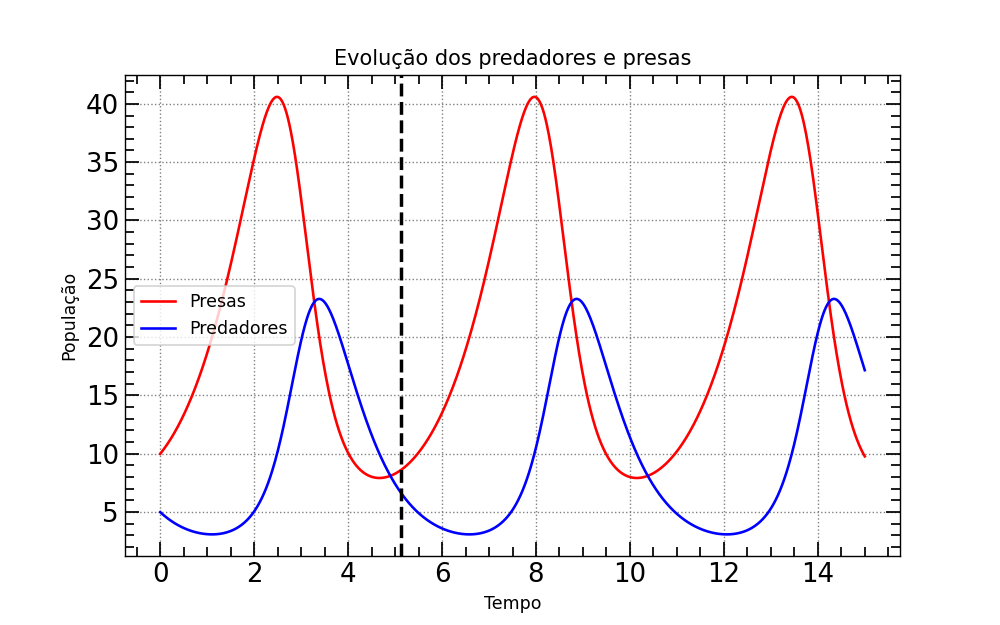

In [5]:
t = np.linspace(0, 15,  1000)             
X0 = np.array([10, 5])                     
X, infodict = integrate.odeint(dX_dt, X0, t, full_output = True) 

preys, preds = X.T

plt.figure(figsize = (8,5))

plt.plot(t, preys, 'r-', label = 'Presas')
plt.plot(t, preds  , 'b-', label = 'Predadores')
plt.axvline(T_f1, c = 'black', lw = 2, ls = '--')

plt.title('Evolução dos predadores e presas')
plt.xlabel('Tempo')
plt.ylabel('População')

plt.legend(loc = 'best')
opt_plot()
plt.savefig('Evolução - Predadores X Presas.png', dpi = 400)

As populações são de fato periódicas, e seu período está próximo ao valor `T_f1` que calculamos anteriormente. Observe como a população de predadores fica atrás da população de presas: um aumento no número de presas resulta em um aumento retardado no número de predadores à medida que os predadores comem mais presas.

#### 0.2.2 Trajetórias e campos direcionais no espaço de fase

Vamos agora traçar algumas trajetórias em um plano no espaço de fase para diferentes pontos de partida entre `X_f0` e `X_f1`. Para isso, vamos usar o [mapa de cores](https://matplotlib.org/stable/tutorials/colors/colormaps.html) (*colormaps*) do Matplotlib

<IPython.core.display.Javascript object>


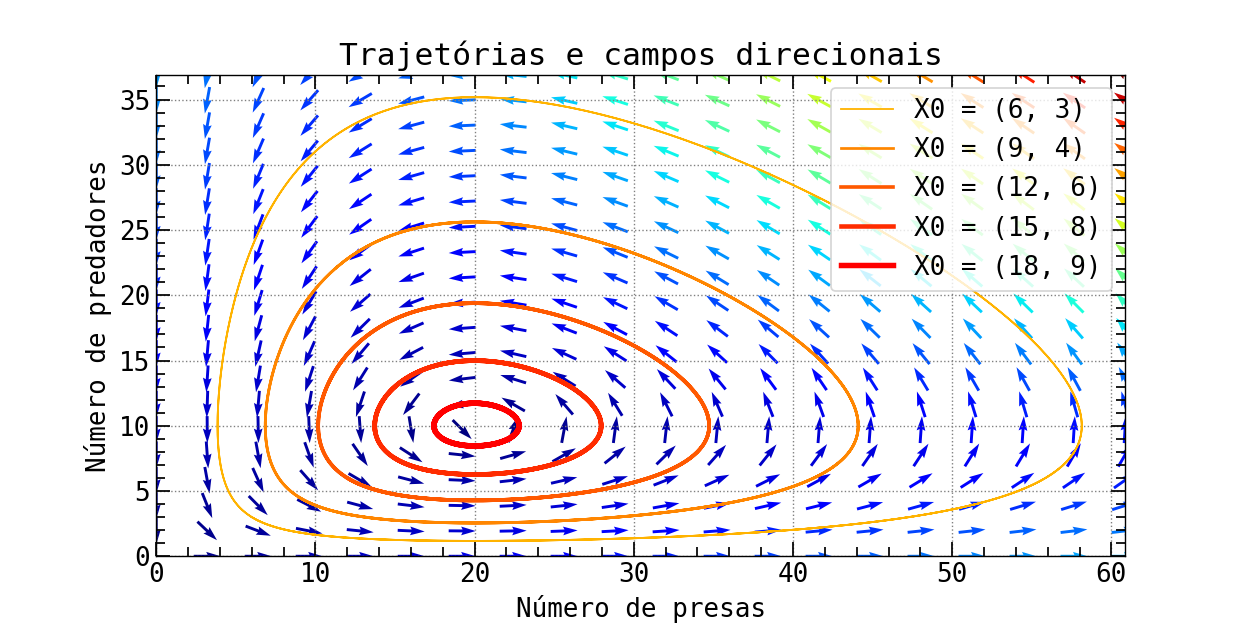

In [6]:
values  = np.linspace(0.3, 0.9, 5)                          
vcolors = plt.cm.autumn_r(np.linspace(0.3, 1., len(values)))  

plt.figure(figsize = (10,5))

# Trajetórias
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               
    X = integrate.odeint( dX_dt, X0, t)         
    plt.plot( X[:,0], X[:,1], lw = 3.5*v, color = col, label = 'X0 = (%.f, %.f)' % ( X0[0], X0[1]) )

ymax = plt.ylim(ymin = 0)[1]                        
xmax = plt.xlim(xmin = 0)[1]
nb_points = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                    
DX1, DY1 = dX_dt([X1, Y1])                      
M = (np.hypot(DX1, DY1))                           
M[ M == 0] = 1.                                  
DX1 /= M                                        
DY1 /= M

#-------------------------------------------------------
# Campos direcionais
plt.title('Trajetórias e campos direcionais')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot = 'mid', cmap = plt.cm.jet)
plt.xlabel('Número de presas')
plt.ylabel('Número de predadores')
plt.xlim(0, xmax)
plt.ylim(0, ymax)


plt.legend(loc = 'best')
opt_plot()
plt.savefig('Trajetórias - Espaço de fase.png', dpi = 400)

Os retratos de fase mostram claramente a periodicidade da oscilação. Observe que as curvas se movem no sentido anti-horário: o número de presas aumenta quando o número de predadores é mínimo e o número de presas diminui quando o número de predadores é máximo. Com isso podemos notar que mudar a população de predadores ou presas pode ter um efeito não intuitivo. Se, para diminuir o número de presas, introduzirmos predadores, isso pode levar a um aumento de presas a longo prazo, dependendo do tempo de intervenção. 

#### 0.2.3 Iso-contornos

Por fim, vamos traçar os iso-contornos do nosso modelo no espaço de fase, eles nos dão uma boa representação das trajetórias, sem termos que integrar o sistema de EDOs:

X0 = ( 6, 3) => I ~ 20.8 |delta = 6.19E-05 %
X0 = ( 9, 4) => I ~ 39.4 |delta = 2.67E-05 %
X0 = (12, 6) => I ~ 55.7 |delta = 1.82E-05 %
X0 = (15, 8) => I ~ 66.8 |delta = 1.12E-05 %
X0 = (18, 9) => I ~ 72.4 |delta = 4.68E-06 %


<IPython.core.display.Javascript object>


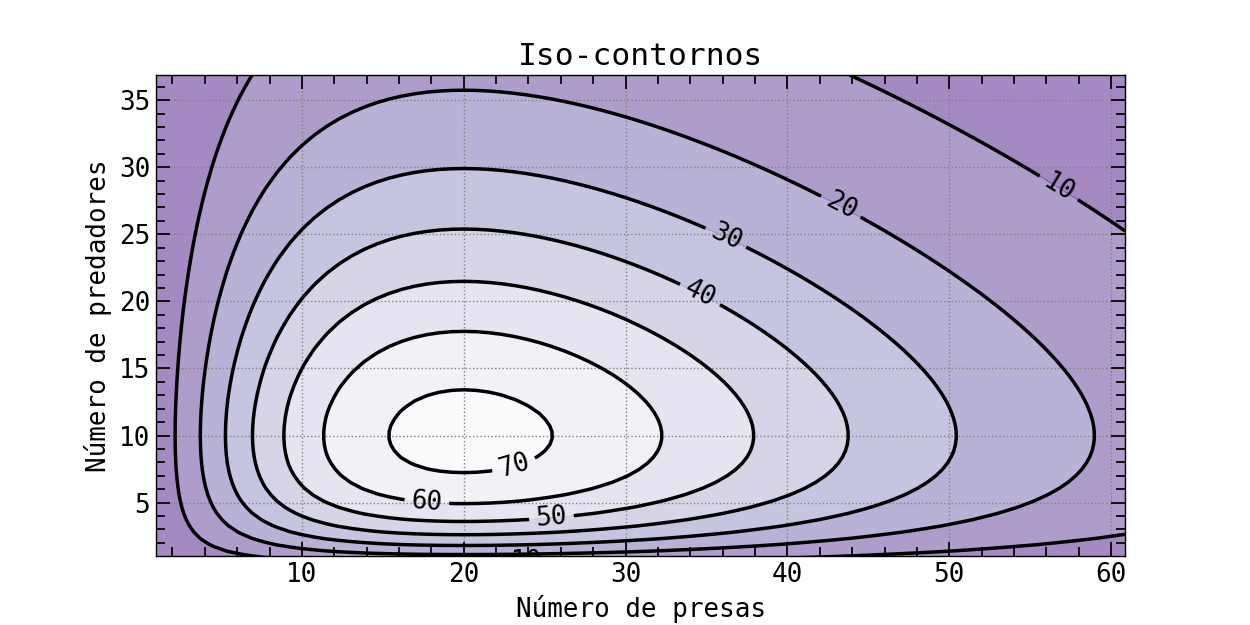

In [7]:
def IF(X):
    u, v = X
    
    return u**(gamma/alpha) * v * np.exp( -(beta/alpha)*(e*u+v) )

for v in values:
    X0 = v * X_f1                              
    X = integrate.odeint( dX_dt, X0, t)
    I = IF(X.T)                                 
    I_mean = I.mean()
    delta = 100 * (I.max() - I.min())/I_mean
    print('X0 = (%2.f,%2.f) => I ~ %.1f |delta = %.3G %%' % (X0[0], X0[1], I_mean, delta))
    
nb_points = 80                              
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
X2 , Y2  = np.meshgrid(x, y)                   
Z2 = IF([X2, Y2])                           

plt.figure(figsize = (10,5))

CS = plt.contourf(X2, Y2, Z2, cmap = plt.cm.Purples_r, alpha = 0.5)
CS2 = plt.contour(X2, Y2, Z2, colors = 'black', linewidths = 2. )
plt.clabel(CS2, inline = 1, fontsize = 15, fmt = '%.f')
plt.title('Iso-contornos')
plt.xlabel('Número de presas')
plt.ylabel('Número de predadores')
plt.ylim(1, ymax)
plt.xlim(1, xmax)

opt_plot()
plt.savefig('Iso-contornos.png', dpi = 400)

Para mais detalhes sobre o tema consulte o material online do minicurso [A Tour of the Generalized Lotka-Volterra Model](https://stefanoallesina.github.io/Sao_Paulo_School/) **[2]** ministrado por Steffano Allesino no ICTP-SAIFR em 2020. O material se encontra disponível online e no canal do [YouTube](https://www.youtube.com/watch?v=loU0O4-dHkw) do [ICTP-SAIFR](https://www.youtube.com/channel/UCHZD5-4GF1lLLUklsxyt3fw).

Tendo finalizado essa revisão não tão breve sobre o modelo de Lotka-Volterra, vamos ao tema deste `Notebook` propriamente dito!

---

## 1. O modelo generalizado de Lotka-Volterra

O modelo generalizado de Lotka-Volterra (gLV, do inglês *generalized Lotka-Volterra Model*) pode ser formulado matematicamente de forma compacta como:

$$\tag{1.1}\boxed{\frac{\text{d}X_{i}}{\text{d}t}=r_{i}X_{i}\left(1+\sum_{j=1}^{N}a_{ij}X_{j}\right)\quad,\quad i=1,2,\ldots,N}$$

onde $r_i$ é a taxa de crescimento intrínseca da população $i$ e a matriz de interação é denotada por $A$ com elementos $a_{ij}$ . Os elementos $a_{ij}$ desta matriz indicam a influência da população $j$ sobre a taxa de crescimento da população $i$ decorrente da interação entre eles. Em particular, o elemento $a_{ii}$ supostamente negativo indica a competição intraespecífica autolimitada e está relacionado com a capacidade de carga da população como $a_{ii}=−1/K_{i}$. Ou seja, o valor de $a_{ii}$ é o inverso da densidade de $X_{i}$ necessária para alterar sua taxa de crescimento em $100\%$. Se essa mudança aumenta ou diminui a taxa de crescimento efetiva depende do sinal de $a_{ii}$. Os valores de todos os elementos $a_{ij}$ podem ser entendidos da mesma forma: $a_{ij}$ é o inverso da densidade de $X_{j}$ que é necessária para alterar a taxa de crescimento de $X_i$ em $100\%$.

Valores pequenos para $a_{ij}$ indicam interação fraca entre populações, de modo que variações na densidade de $X_j$ têm pouco efeito na taxa de crescimento de $X_i$ e vice-versa. Um valor zero ($a_{ij}=0$) indica nenhuma influência de $X_j$ sobre $X_i$.

Dessa forma, as interações ecológicas entre duas populações $i$, $j$ serão dadas pelos valores dos coeficientes de interação mútua $a_{ij}$, $a_{ji}$. Se esses coeficientes forem ambos positivos, há uma interação mutualística entre $i$, $j$ enquanto valores negativos indicam interações competitivas. Se os coeficientes tiverem sinais opostos, indica uma interação exploradora. Por exemplo, se $a_{ij}>0$ e $a_{ji}<0$, a interação beneficia a população $X_i$ enquanto prejudica a população $X_j$. Este cenário corresponde ao caso em que a população $X_i$ antecede a população $X_j$.

Para um estudo mais aprofundado e detalhado deste modelo para diferentes números totais de populações na comunidade biológica em análise, consulte a tese de Mestrado de *Santos, R. M.*: [Exploring Ecological Interactions Using the Generalized Lotka Volterra Model: Coexistence and Resilience of Populations](https://ppgfis.ufba.br/sites/ppgfis.ufba.br/files/rafael_menezes_msc_dissertationupdated.pdf) **[3]**, defendida em 2020.

### 1.1 Modelo de Hastings

Sabemos que os animais vivem em ecossistemas onde os animais podem ser predadores ou presas. Pode até haver mais complicações nas relações animais, como simbiose ou comportamento necrófago. O *modelo de Hastings* é um modelo tridimensional Lotka-volterra onde as taxas de alimentação são proporcionais às proporções das populações. Ao escolher determinados valores de parâmetros, as trajetórias podem gerar atratores estranhos e, assim, exibir o caos. Dessa forma, o modelo não dimensional de Hastings é o seguinte:

$$\tag{1.2}\begin{cases}
\dot{x}=x\left(1-x\right)-f_{1}\left(x\right)y & \\
\dot{y}=f_{1}\left(x\right)y-f_{2}\left(y\right)z-d_{1}y & \\
\dot{z}=f_{z}\left(y\right)z-d_{3}z & 
\end{cases}\quad,\quad f_{i}\left(u\right)=\frac{a_{i}u}{1+b_{i}u}.$$

As funções $f_{i}\left(u\right)$ são funções de crescimento logístico. Uma função semelhante aparece no *modelo Spruce-budworm*. Se mais de uma espécie de presa estiver presente, torna-se mais provável que ela seja encontrada e comida. Assim, as funções fornecem um modelo mais realista de predação no mundo natural. Tomando as sugestões do autor para os parâmetros temos:

$$\tag{1.3}\begin{cases}
a_{1}=5 & \\
b_{1}=3 & 
\end{cases}\quad;\quad\begin{cases}
a_{2}=0.1 & \\
b_{2}=2 & \\
d_{1}=0.01 & 
\end{cases}$$

Os pontos fixos foram encontrados por Hastings e Klebanoff alguns anos após a publicação inicial:

$$\tag{1.4}\begin{cases}
\left(x,y,z\right)=\left(0,0,0\right) & ,\\
\left(x,y,z\right)=\left(1,0,0\right) & ,\\
\left(x,y,z\right)=\left(0,\frac{d_{1}}{a_{1}-d_{1}b_{1}},\frac{a_{1}-b_{1}d_{1}-d_{1}}{\left(a_{1}-b_{1}d_{1}\right)^{2}}\right) & ,\\
\left(x,y,z\right)=\left(0,\frac{d_{2}}{a_{2}-b_{2}d_{2}},\frac{-d_{1}}{a_{2}-b_{2}d_{2}}\right) & ,\\
\left(x,y,z\right)=\left(\hat{x}_{i},\hat{y}_{i},\hat{z}_{i}\right),\text{ }i=1,2 & .
\end{cases}$$

Os parâmetros acima realmente darão origem a um atrator estranho como veremos a seguir. Além disso, o sistema também apresenta caos, sensibilidade às condições iniciais.

### 1.2 Pacote `LoVolMo`

Para simular numericamente o modelo de Hasting vamos utilizar o pacote `LoVolMo` (`Lo`tka-`Vol`lterra `Mo`del) escrito em Python por Rocha, G. W. C. **[4]**. Esse pacote possui três módulos: `TwoSpeciesModel()`, `ThreeSpeciesModel()` e `HastingModel()`. Cada um dos módulos simula o modelo gLV dada para um caso particular.

Para instalar o `LoVolMo` basta executar o seguinte comando no terminal de sua preferência:

```Python
pip3 install git+https://github.com/GabrielWendell/LoVolMo
```

Alternativamente, você pode acessar os scripts do `LoVolMo` acessando o diretório [`Scripts/LoVolMo`](https://github.com/GabrielWendell/PET.py/tree/main/Scripts/LoVolMo) e baixando os arquivos [`LoVolMo_core.py`](https://github.com/GabrielWendell/PET.py/blob/main/Scripts/LoVolMo/LoVolMo_core.py) e [`LoVolMo_master.py`](https://github.com/GabrielWendell/PET.py/blob/main/Scripts/LoVolMo/LoVolMo_master.py) e executando-os em uma IDE de sua preferência.

- `LoVolMo_core.py`: contém todas as funções necessárias para executar os módulos mencionados acima;

- `LoVolMo_master.py`: apenas um *branch master* para chamar todas as funções do `LoVolMo_core.py` e gerar todos os gráficos de uma vez.

Dito isso, você pode executar os scripts diretamente pelo `Jupyter` da seguinte forma:

``` Python
import LoVolMo_core as LV

LV.HastingsModel()
```

Você notará que o modelo de Hastings é caótico, uma vez que o atrator estranho gerado é altamente sensível aos parâmetros iniciais, como de costume em sistemas biológicos.

---

## 2. Condições para o ponto de coexistência em um modelo multiespécie de Lotka-Volterra

É simples generalizar as equações clássicas de competição de Lotka-Volterra para tratar várias espécies:

$$\tag{2.1} \frac{dN_i}{dt} = r_i N_i \left( 1 - \sum_j a_{ij} N_j \right).$$

onde $a_{ij}\leq0$ é o efeito da espécie $j$ sobre a espécie $i$, e $a_{ii}=\frac{1}{K_{i}}$. Um ponto fixo deve satisfazer:

$$\tag{2.2} \sum_j a_{ij} N_j = 1 \;,\forall\, i.$$

Em particular, para que seja positivo, devemos ter:

$$\tag{2.3} N_i = 1-\frac{1}{a_{ii}}\sum_{j \neq i} a_{ij}N_j > 0  \;,\forall i.$$

Cada população, isoladamente, atinge no máximo sua capacidade de suporte $(N^{∗}_{j}\leq1/a_{jj})$. Então uma condição suficiente (mas não necessária) para a invasibilidade mútua - que garante a existência de tal ponto fixo é:

$$\tag{2.4} \frac{1}{a_{ii}}\sum_{j \neq i} a_{ij}N_j \leq \frac{1}{a_{ii}}\sum_{j \neq i} \frac{a_{ij}}{a_{jj}} < 1 \; , \forall i.$$

Expressando $a$ como uma matriz, isso significa que, em cada coluna, suas entradas divididas pela entrada diagonal de cada linha somam no máximo o termo diagonal da coluna. podemos tornar isso mais simples reescalonando todas as populações por suas capacidades de suporte, de modo que $N′_{i}=a_{ii}N_{i}$ e $b_{ij}=a_{ij}/a_{jj}$ (em particular, $b_{ii}=1$), então as equações diferenciais são lidas (depois de descartar os primos):

$$\tag{2.5} \frac{dN_i}{dt} = r_i N_i \left( 1 - N_i - \sum_{j\neq i} b_{ij} N_j \right)\quad\therefore\quad\boxed{\sum_{j\neq i} b_{ij} < 1 \;,\forall i.}$$

que diz que a soma sobre todas as entradas não diagonais de cada coluna deve ser menor que $1$.

Abordando o problema usando álgebra matricial, a solução é

$$\tag{2.6} N^* = B^{-1} [1]\iff N^{*}=A^{-1} [1],$$

onde $N^{∗}$ é o vetor de populações, $B(A)$ é a matriz composta pelo $b_{ij}$ $(a_{ij})$, e $[1]$ é uma coluna cujas entradas são $1$. Também podemos encontrar o ponto fixo por iteração, resultando:

$$\tag{2.7} N^* = \left[\sum_{i=0}^\infty (-1)^i B^i\right] [1]$$

### 2.1 Critério de estabilidade

Assumindo que existe um ponto fixo positivo, o Jacobiano calculado nesse ponto é

$$\tag{2.8} \boxed{J_{ij} = r_i N^*_i b_{ij}}$$

e a estabilidade é determinada pela parte real de seu maior autovalor. Uma condição *necessária* para a estabilidade é

$$\tag{2.9}(-1)^S \text{det}(B) > 0,$$

onde $S$ é o número de espécies. O mesmo critério se aplica sem reescalonar, ou seja, $(−1)^{S}\text{det}(A)>0$.

### 2.2 Sumarizando tudo isso...

Temos duas condições *necessárias* para a existência de um ponto fixo estável:

- $N^{∗}=B^{−1}[1]$ produz valores positivos apenas para as populações $N_{i}$;
- $(-1)^{S}\text{det}(B)>0$.

Ambos também são válidos sem alterar as escalas populacionais, ou seja, para a matriz $A$.

Temos uma condição *suficiente* de invasibilidade mútua, que garante que a solução seja positiva:

$$\tag{2.10} \sum_{j\neq i} b_{ij} < 1 \;,\forall i.$$

Isso, reescrito em termos de parâmetros não redimensionados, diz:

$$\tag{2.11} \frac{1}{a_{ii}}\sum_{j \neq i} \frac{a_{ij}}{a_{jj}} < 1 \; , \forall i.$$

Podemos estabelecer através de simulações que as duas primeiras condições necessárias não são suficientes, apresentando sistemas que as satisfazem, mas cuja solução simulada leva à exclusão de algumas populações. A mesma informação pode ser obtida calculando o autovalor em torno do ponto fixo de coexistência.

### 2.3 Perturbação recorrente em um sistema competitivo como mortalidade extra média

Suponha que a cada período $\tau$ o sistema sofra uma perturbação que causa a morte de uma fração $m$ das populações. A maneira como isso acontece é uma suposição chave para o que fazemos a seguir: se a perturbação ocorrer por meio do esgotamento dos recursos, ou pela redução da área disponível, esperaríamos que a competição, tanto intra quanto interespecífica, fosse alterada de alguma forma. Ao assumir que essa perturbação leva diretamente à morte, evitamos tais complicações (que podem ser interessantes, mas mais complexas).

Veremos uma única população, mas depois veremos que o mesmo resultado deve ser aplicado a qualquer número de populações. O caso de uma única espécie se reduz à equação logística, com um impulso periódico (esta é a chamada *equação diferencial impulsiva*):

$$\tag{2.12} \begin{aligned}
    \frac{dN}{dt} &= rN\left(1-\frac{N}{K}\right) &\text{para }t \neq k \tau, \\
    N(t^+) &= (1-m) N(t^-) &\text{em } t=k\tau, k\in\mathbb{N}.
\end{aligned}$$

Calculamos a média da mortalidade da seguinte maneira: a solução da relação de recorrência, ignorando a dinâmica no intervalo contínuo, seria $N(t_{k})=(1−m)^{k}N(t_{0})=N(t_{0})e^{k\log{(1−m)}}$. Aproximando esta solução em tempo contínuo, ela se tornaria $N(t)=N(0)e^{t\tau\log{(1−m)}}$. Esta é a mesma solução que seria obtida a partir de uma equação diferencial que lê

$$\tag{2.13} \frac{dN}{dt} = \frac{\log(1-m)}{\tau} N = -dN.$$

Portanto, definimos $d=−\log(1−m)\cdot\tau^{-1}$ e reescrevemos uma equação diferencial de tempo contínuo incluindo a perturbação discreta como uma mortalidade contínua:

$$\tag{2.14} \frac{dN}{dt} = rN\left(1-\frac{N}{K}\right) -dN.$$

Invertendo a expressão para $d$, temos que $m=1−e^{−\text{d}\tau}$. Comparamos as soluções das equações diferenciais impulsivas e ordinárias (contínuas) abaixo.

### 2.4 Codificando nosso modelo

Vamos codificar o nosso modelo de multiespécies resolvendo numericamente a equação diferencial impulsiva $(2.14)$. Para isso, vamos resolver a equação diferencial usando o módulo `integrate.odeint` do `SciPy` e comparar com o resultado da equação diferencia média:

In [8]:
r = 1.
K = 10.
tau = .5
d = .1
m = 1 - np.exp(-d*tau)
tmax = 20.

n = int(tmax / tau)
y0 = 1.

dt = 0.001

def logist(y, t, r, K, d):
    return r*y*(1 - y/K) - d*y

# Equação impulsiva
t = np.arange(0, tau + dt/2., dt)
y = np.array([y0])
for i in range(n):
    yi = integrate.odeint(logist, y[-1]*(1-m), t, (r, K, 0))
    y = np.vstack((y, yi[1:]))
y = y[1:]

# Equação diferencial média
tt = np.arange(0, n*tau, dt)
ya = integrate.odeint(logist, y0, tt, (r, K, d))

Vamos plotar o resultado numérico da solução ndireta de nossa equação diferencial impulsiva com o resultado médio da mesma:

<IPython.core.display.Javascript object>


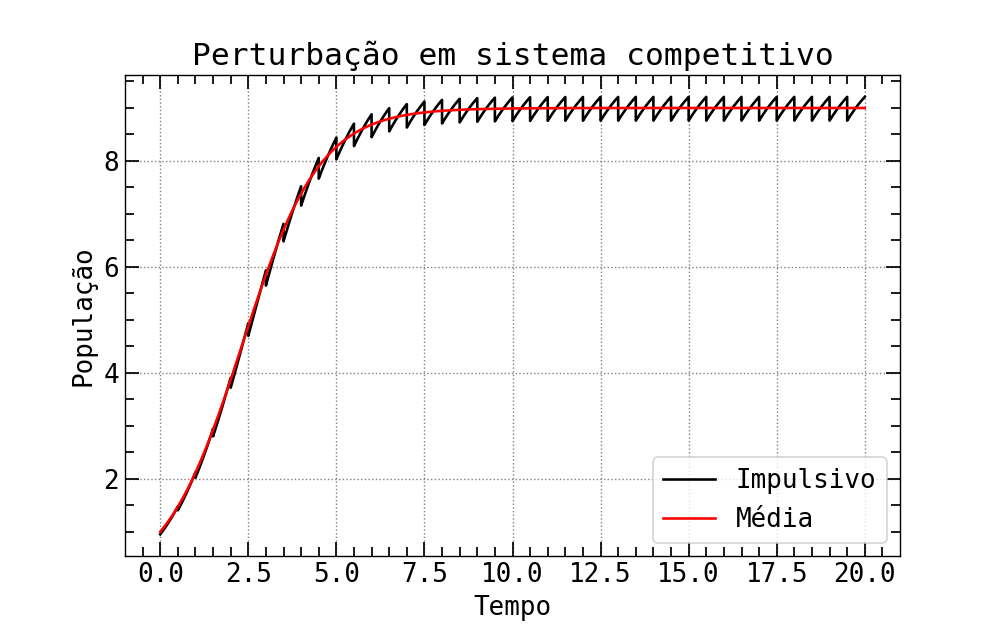

In [9]:
plt.figure(figsize = (8,5))

plt.plot(tt, y, color = 'black', label = 'Impulsivo')
plt.plot(tt, ya, color = 'red', label = 'Média')
plt.title('Perturbação em sistema competitivo')
plt.xlabel('Tempo')
plt.ylabel('População')

plt.legend(loc = 'best')
opt_plot()
plt.savefig('Eq.Dif.Impulsiva.png', dpi = 400)

### 2.5 Coexistência sob uma mortalidade constante

Agora vamos supor que há uma perturbação recorrente, que pode ser aproximada por uma taxa de mortalidade constante, $d$, que inflige todas as populações igualmente. Assumimos que essa mortalidade é menor que a taxa máxima de crescimento de cada população $(d<r_i)$. Então as equações agora são:

$$\tag{2.15} \frac{dN_i}{dt} = r_i N_i \left( 1 - N_i - \sum_{j\neq i} b_{ij} N_j \right) - d N_i=(r_i-d) N_i \left( 1 - \frac{r_i}{r_i-d}N_i - \frac{r_i}{r_i-d}\sum_{j\neq i} b_{ij} N_j \right).$$

que pode ser reescalonado por $N′_{i}=\frac{r_{i}}{r_{i}−d}N_{i}$, resultando em (descartando primos):

$$\tag{2.16} \frac{dN_i}{dt} = (r_i-d) N_i \left( 1 - N_i - \frac{r_i}{r_i-d}\sum_{j\neq i} b_{ij} N_j \frac{r_j-d}{r_j} \right).$$

Este sistema é da mesma forma que na primeira seção, com

$$\tag{2.17} \begin{aligned}
    r_i' &= r_i-d, \\
    b_{ij}' &= \frac{1-\tfrac{d}{r_j}}{1-\tfrac{d}{r_i}} b_{ij}.
    \end{aligned}$$

Agora a condição de existência do ponto fixo torna-se

$$\tag{2.18} \frac{r_i}{r_i-d} \sum_{j\neq i} \left(1-\frac{d}{r_j}\right) b_{ij} = 
\frac{1}{c_i} \sum_{j\neq i} c_j b_{ij} < 1 \;,\forall i$$

onde $c_{i}\equiv\left(1-d/r_{i}\right)\leq1$ sempre aumenta com $r_i$. Sob a escala populacional original (ou seja, usando os parâmetros $a_{ij}$), a adição de uma mortalidade $d$ leva a um novo sistema com parâmetros equivalentes a:

$$\tag{2.19} \begin{aligned}
    r_i'&= r_i-d \\
    a_{ij}' &= \frac{1}{1-\tfrac{d}{r_i}} a_{ij}
    \end{aligned} ~,$$

o que também afeta as capacidades de carga $K_{i}=\frac{1}{a_{ii}}$.

### 2.6 O caso de duas espécies

A análise é consideravelmente mais simples se tivermos apenas $2$ espécies. Nesse caso, também podemos calcular o ponto fixo diretamente. Primeiro, as condições para o $C_{i}$ são:

$$\tag{2.20} C_1 = \frac{c_2}{c_1} b_{12} < 1\quad,\quad 
   C_2 = \frac{c_1}{c_2} b_{21} < 1$$

Podemos ver que $C_{1}C_{2}=b_{12}b_{21}$, então se começarmos com $b$'s tal que este produto seja maior que $1$, é impossível ter ambos os $C$'s menores que $1$, não importa o valor dos $c_i$'s (ou seja, $d$ e os $r_i$'s). Tanto para condições suficientes. Os pontos fixos podem ser encontrados explicitamente (assumindo nenhuma perturbação):

$$\tag{2.21} N_1^* = \frac{1-b_{12}}{1-b_{21} b_{12}} \quad,\quad N_2^* = \frac{1-b_{21}}{1-b_{21} b_ {12}}\text{ },$$

e o jacobiano neste ponto fixo é:

$$\tag{2.22}J = \begin{pmatrix} 
-r_1 N_1^*       & -b_{12} r_1 N_1^* \\
-b_{21} r_2 N_2^* &-r_2 N_2^*
\end{pmatrix} .$$

Assim, as condições necessárias e suficientes para uma coexistência estável são $b_{12}b_{21}<1$ e $b_{12}$, $b_{21}<1$. Sob perturbação, a primeira condição $(b_{12}b_{21}<1)$ permanece a mesma, enquanto a segunda lê $b_{12}c_{2}/c_{1}$, $b_{21}c_{1}/c_{2}<1$. Assim, se na ausência de perturbação uma espécie for excluída, mas a primeira condição for satisfeita, haverá um valor para a perturbação d que leva à coexistência se a espécie inicialmente excluída tiver um $r$ maior.

### 2.7 O efeito líquido da mortalidade

Vamos definir o parâmetro $C_i$ da seguinte forma:

$$\tag{2.23} C_i(d, \vec{r}, B) \equiv \frac{1}{c_i} \sum_{j\neq i} c_j b_{ij}\text{ },$$

o que a condição de coexistência é apenas $C_{i}<1$. Podemos avaliar o efeito das perturbações calculando $dC_{i}/d\{d\}$:

$$\tag{2.24} \frac{dC_i}{d\{d\}} = \frac{1}{r_i-d} \left(C_i - r_i \sum_{j\neq i} \frac{1}{r_j} b_{ij}\right)
=  \frac{r_i}{(r_i-d)^2} \sum_{j\neq i} \left(\frac{r_j-r_i}{r_j} b_{ij}\right).$$

Vemos assim que a **perturbação facilita a persistência de espécies de crescimento rápido** ($r_{i}>r_{j}$ para cada $j$ leva a $dC/d\{d\}<0$).

### 2.8 *Trade-offs* entre crescimento e capacidade competitiva

Vamos reescrever a última condição em termos dos parâmetros de competição originais $a_{ij}$:

$$\tag{2.25} \frac{1}{a_{ii}\left(1-\frac{d}{r_i}\right)}\sum_j \left(1-\frac{d}{r_j}\right)\frac{a_{ij}}{a_{jj}}  < 1 \;,\forall i.$$

O próximo passo seria introduzir um *trade-off* entre a taxa de crescimento intrínseca $r$ e a capacidade competitiva $a$. Entretanto, isso ficará para um `Notebook` futuro...

---

## Referências

- **[1]** *Interação predatória e equações de Lotka-Volterra*: https://github.com/gustavoavb/PET.py/blob/master/Equações_de_Lotka-Volterra.ipynb

- **[2]** *A Tour of the Generalized Lotka-Volterra Model*: https://stefanoallesina.github.io/Sao_Paulo_School/

- **[3]** *Exploring Ecological Interactions Using the Generalized Lotka-Volterra Model: Coexistence and Resilience of Populations*: https://ppgfis.ufba.br/sites/ppgfis.ufba.br/files/rafael_menezes_msc_dissertationupdated.pdf

- **[4]** *LoVolMo package*: https://github.com/GabrielWendell/LoVolMo

---